# MAPK/PI3K Physics-Informed Hybrid Model

This notebook evaluates the baseline MATLAB-calibrated physics model and provides training capabilities.

## 1. Environment Setup

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# Ensure correct working directory is set
project_dir = '/projects/vanaja_lab/satya/HybridModel'


from configs import get_baseline_configs
from data_loader import get_experimental_data

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


## 2. Visualize Experimental Data

Load and plot the Western Blot data for the 3 treatment conditions.

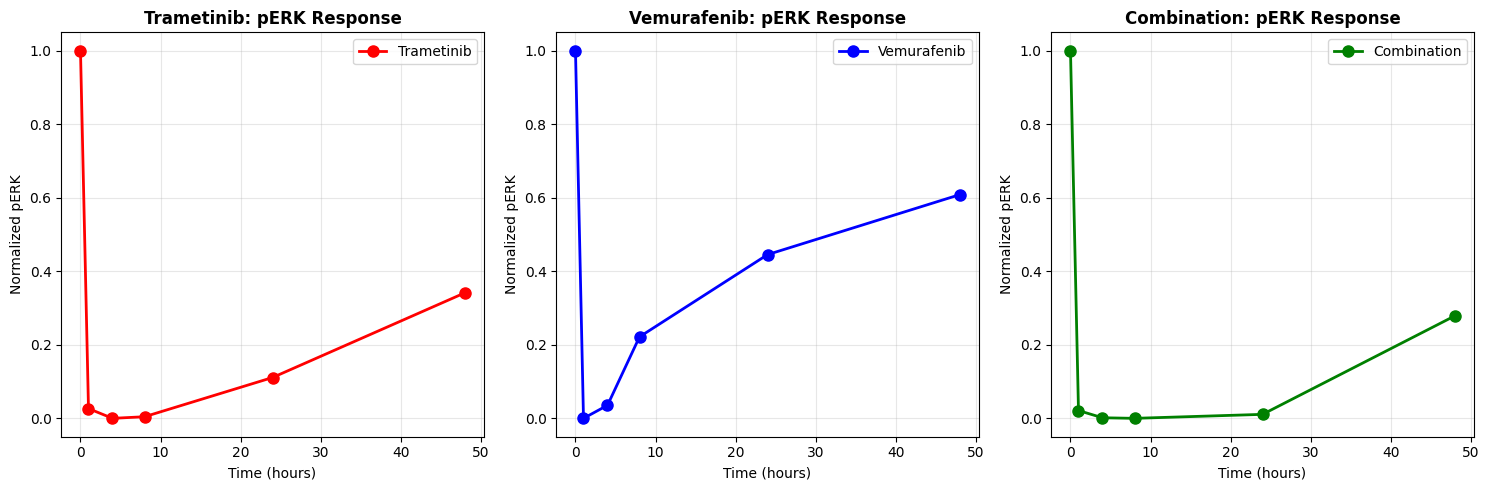


Data loaded for 6 time points: [ 0.  1.  4.  8. 24. 48.] hours


In [2]:
data = get_experimental_data()
times_h = data['times'].numpy() / 3600.0

# Plot pERK across all conditions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(times_h, data['tram']['pERK'], 'ro-', label='Trametinib', linewidth=2, markersize=8)
plt.title('Trametinib: pERK Response', fontsize=12, fontweight='bold')
plt.xlabel('Time (hours)')
plt.ylabel('Normalized pERK')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(times_h, data['vem']['pERK'], 'bo-', label='Vemurafenib', linewidth=2, markersize=8)
plt.title('Vemurafenib: pERK Response', fontsize=12, fontweight='bold')
plt.xlabel('Time (hours)')
plt.ylabel('Normalized pERK')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(times_h, data['combo']['pERK'], 'go-', label='Combination', linewidth=2, markersize=8)
plt.title('Combination: pERK Response', fontsize=12, fontweight='bold')
plt.xlabel('Time (hours)')
plt.ylabel('Normalized pERK')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nData loaded for {len(data['times'])} time points: {times_h} hours")

## 3. Evaluate Baseline Physics Model

Run the MATLAB-calibrated ODE model (no Neural Network, no training) to see how well it predicts the experimental data.

BASELINE PHYSICS EVALUATION

Running 48-hour simulations...
✓ Simulations complete!

RESULTS
Trametinib     : MSE = 0.292293
Vemurafenib    : MSE = 0.316102
Combination    : MSE = 0.272358

Overall Average MSE: 0.293584

GENERATING PLOTS
✓ Plots saved to: /projects/vanaja_lab/satya/HybridModel/outputs/baseline_physics_evaluation.png

INTERPRETATION
The plots show:
  • Lines = Model predictions (pure MATLAB physics)
  • Dots  = Your experimental Western Blot data

A good fit means the MATLAB model already captures the biology well.
Discrepancies indicate where a Neural Network could add value later.


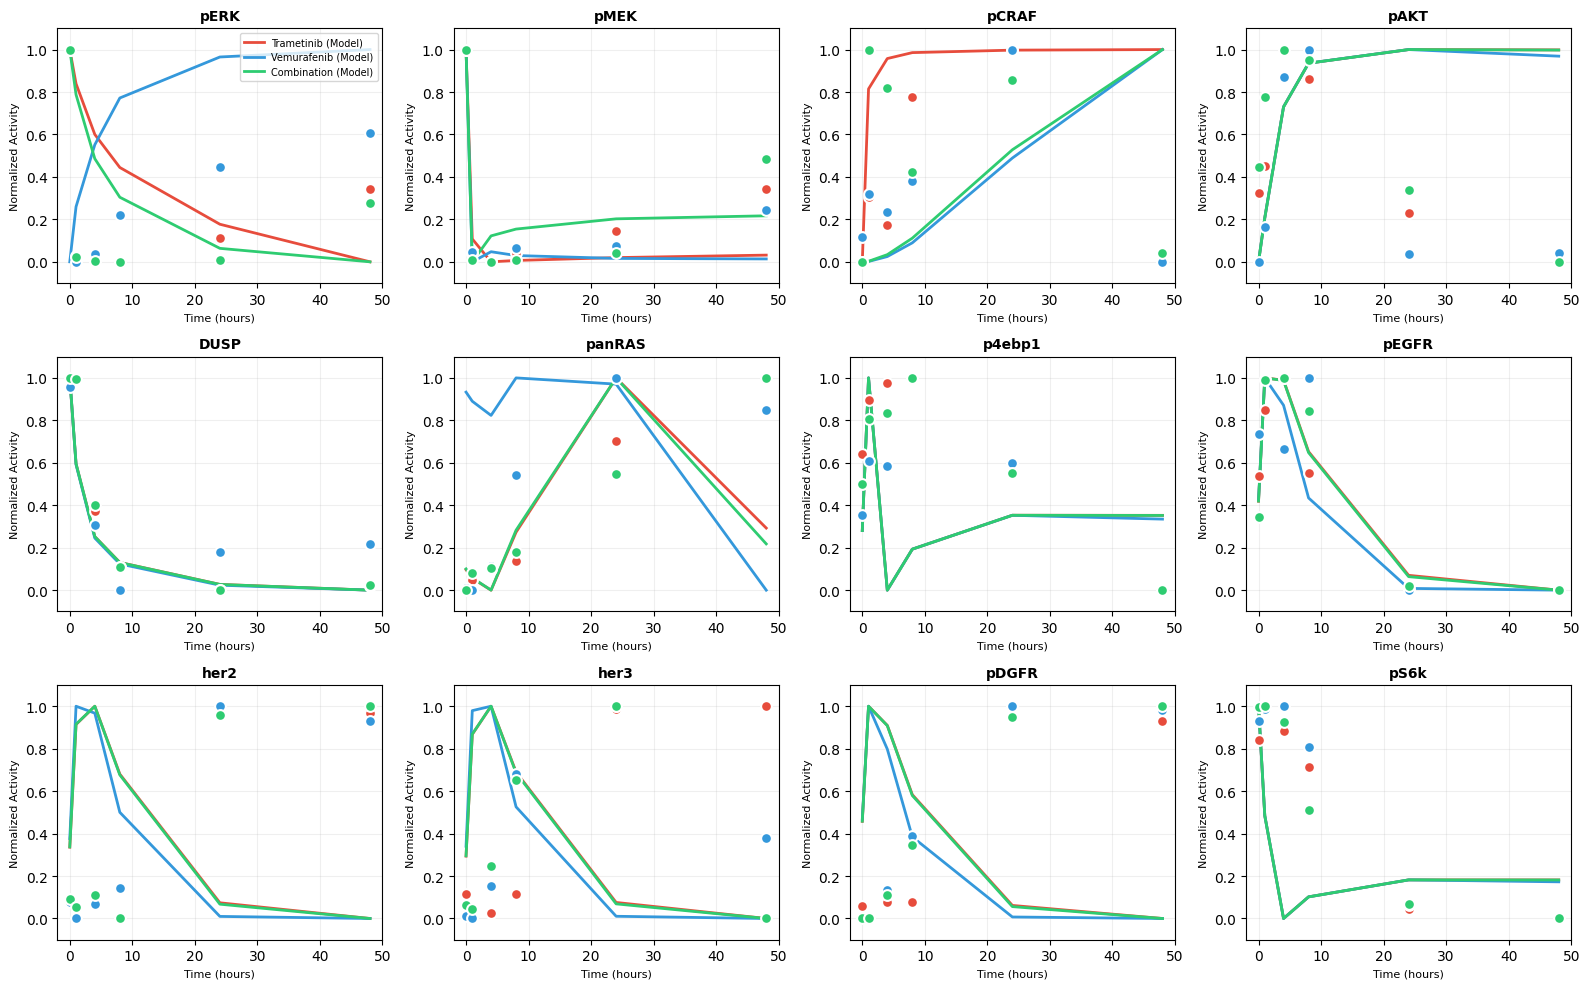

In [3]:


%run /projects/vanaja_lab/satya/HybridModel/evaluate_baseline.py

## 5. Next Steps

Based on the baseline evaluation:

- **If MSE < 0.1**: The physics model is already excellent. Use it directly for predictions.
- **If 0.1 < MSE < 0.5**: Moderate fit. Consider simple parameter scaling instead of Neural Network.
- **If MSE > 0.5**: Poor fit. The MATLAB parameters may need recalibration.

For zero-shot predictions of new drug combinations (Vem+RASi, Vem+PI3Ki), the pure physics model can be used by setting the appropriate drug concentration vectors.

In [ ]:
from train_windowed import train_windowed_model
train_windowed_model(epochs=100, lr=1e-3)

WINDOWED HYBRID MODEL TRAINING
Trainable parameters: 10133
  - Condition embeddings: 48
  - Correction network: 10085

TRAINING
Epoch 000 | Loss: 0.228852 | Grad: 0.02 | CorrScale: 0.0110
